# Introduction
In this kernel I will go through the whole process of creating a machine learning model on the famous Titanic dataset, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
original_train_data = pd.read_csv('data/train.csv')
original_test_data = pd.read_csv('data/test.csv')


In [3]:
train_data = original_train_data.copy()
test_data = original_test_data.copy()


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Description
The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

survival:   Survival
PassengerId: Unique Id of a passenger.
pclass: Ticket class    
sex:    Sex 
Age:    Age in years    
sibsp:  # of siblings / spouses aboard the Titanic  
parch:  # of parents / children aboard the Titanic  
ticket: Ticket number   
fare:   Passenger fare  
cabin:  Cabin number    
embarked:   Port of Embarkation

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature.

In [8]:
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Analysis of above Data
From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with

# Let's take a more detailed look at what data is actually missing

In [9]:
total = train_data.isnull().sum().sort_values(ascending = False)
percent_1 = train_data.isnull().sum() / train_data.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total','%'])
missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the 'Age' feature, which has 177 missing values. The 'Cabin' feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing

In [10]:
train_data.columns.values #train_data.columns

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

 Above you can see the 11 features + the target variable (survived). 
# What features could contribute to a high survival rate ?
for me it would make sense if everything except 'PassengerId', 'Ticket' and 'Name' would be correlated with a high survival rate.

# 1. Age and Sex:

Text(0.5, 1.0, 'Male')

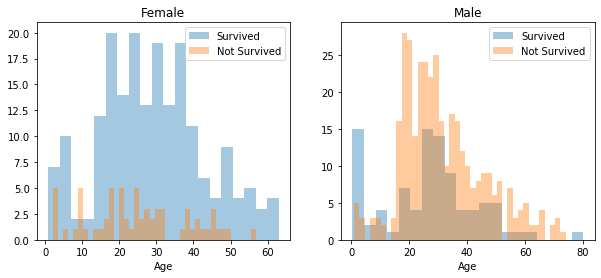

In [11]:
import seaborn as sns
survived = "Survived"
not_survived = "Not Survived"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde =False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde =False)
ax.legend()
ax.set_title('Male')

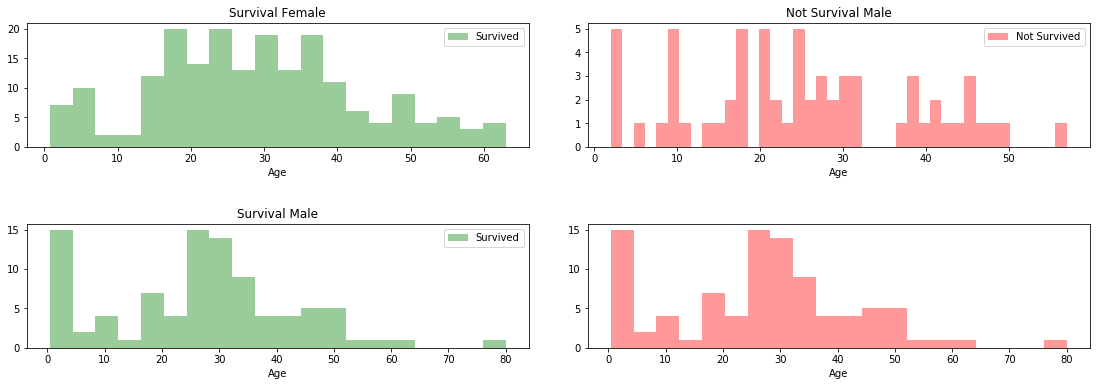

In [12]:
## Lets See in separate Graph
survived = "Survived"
not_survived = "Not Survived"
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 6))
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']
ax1 = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived,color = 'green', ax = axes[0][0], kde =False)
ax2 = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived,color = 'red', ax = axes[0][1], kde =False)
ax1.legend()
ax1.set_title('Survival Female')
ax2.legend()
ax2.set_title('Not Survival Female')

ax1 = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived,color = 'green', ax = axes[1][0], kde =False)
a2 = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = not_survived,color = 'red', ax = axes[1][1], kde =False)
ax1.legend()
ax1.set_title('Survival Male')
ax2.legend()
ax2.set_title('Not Survival Male')
fig. tight_layout(pad=3.0)


You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

In [13]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Now let Analyse survival rate correspond to Pclass

In [14]:
pclass = train_data.groupby(['Pclass','Survived'])['Survived'].count()
pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [15]:
pclass1 = train_data.groupby(['Pclass','Survived'])['Survived'].count().groupby('Survived').sum()
pclass1

Survived
0    549
1    342
Name: Survived, dtype: int64

In [16]:
datag = pd.DataFrame(pclass)
datag

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

In [17]:
datag['Survived'][1].values

array([ 80, 136], dtype=int64)

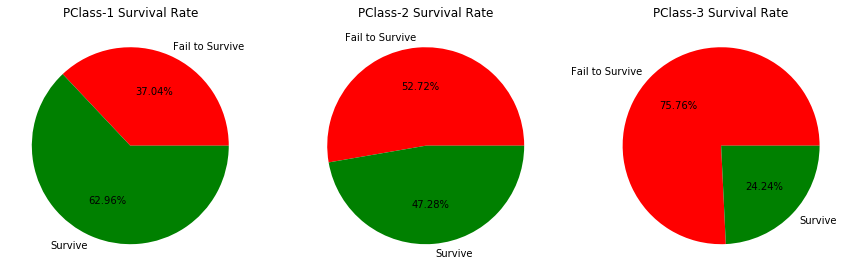

In [18]:
## PrePare Pie char to understand it more closely
fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (15,8))

axs[0].pie(datag['Survived'][1].values, labels = ['Fail to Survive','Survive'],autopct='%1.2f%%', colors = ['red','green'])
axs[0].set_title('PClass-1 Survival Rate')

axs[1].pie(datag['Survived'][2].values, labels = ['Fail to Survive','Survive'],autopct='%1.2f%%',colors = ['red','green'])
axs[1].set_title('PClass-2 Survival Rate')

axs[2].pie(datag['Survived'][3].values, labels = ['Fail to Survive','Survive'],autopct='%1.2f%%',colors = ['red','green'])
axs[2].set_title('PClass-3 Survival Rate')
plt.show()


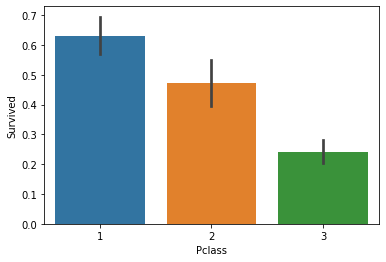

In [19]:

sns.barplot(x='Pclass', y='Survived', data=train_data)

# So Here we can see that ,passenger who are in PClass-1 , have higher survival rate than PClass-2 & PClass-3, it is Shocking that passengers who are in PClass-1,has lower survival rate

In [20]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Now let Analyse survival rate correspond to Embarked

In [21]:
train_data.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [22]:
embark = train_data.groupby(['Embarked','Survived'])['Survived'].count()
embark

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [23]:
embarkSR = pd.DataFrame(embark)
embarkSR

Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              217

In [24]:
embarkSR['Survived']['C'].values

array([75, 93], dtype=int64)

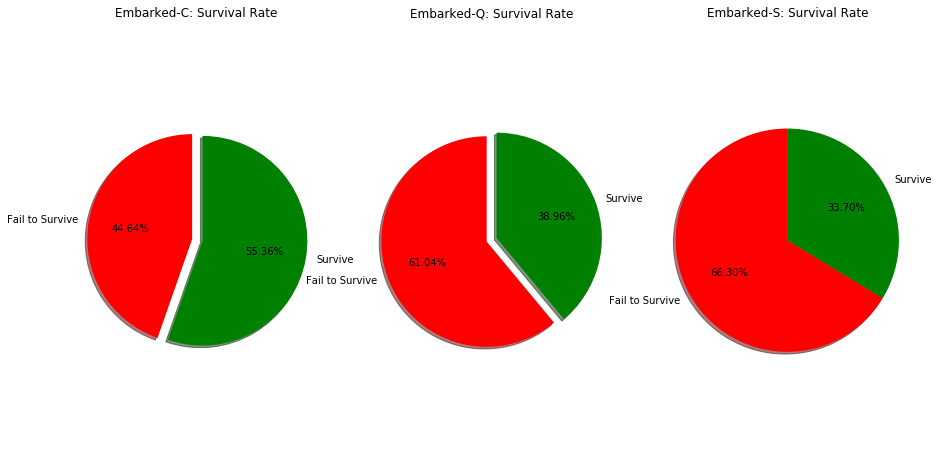

In [25]:
## PrePare Pie char to understand it more closely
fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (15,8))
explode = (0, 0.1)
axs[0].pie(embarkSR['Survived']['C'].values, labels = ['Fail to Survive','Survive'],autopct='%1.2f%%', colors = ['red','green'],shadow=True, startangle=90,explode = explode)
axs[0].set_title('Embarked-C: Survival Rate')
axs[0].axis('equal')
axs[1].pie(embarkSR['Survived']['Q'].values, labels = ['Fail to Survive','Survive'],autopct='%1.2f%%',colors = ['red','green'],shadow=True, startangle=90,explode = explode)
axs[1].set_title('Embarked-Q: Survival Rate')
axs[1].axis('equal')
axs[2].pie(embarkSR['Survived']['S'].values, labels = ['Fail to Survive','Survive'],autopct='%1.2f%%',colors = ['red','green'],shadow=True, startangle=90)
axs[2].set_title('Embarked-S: Survival Rate')
axs[2].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


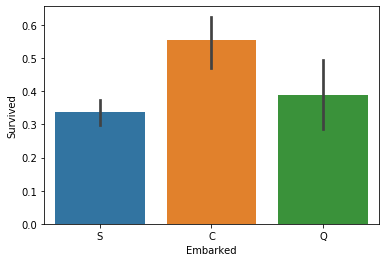

In [26]:
sns.barplot(x='Embarked', y='Survived', data=train_data)

# Here, we can see that Embarked-S has 66.30% insecurity where as Embarked-C has more secure survival rate as compare to others

In [27]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# SibSp and Parch:

In [28]:
train_data['relatives'] = train_data['SibSp'] + train_data['Parch']

train_data.loc[train_data['relatives'] > 0,'not_alone'] = 1
train_data.loc[train_data['relatives'] == 0,'not_alone'] = 0


In [29]:
train_data['not_alone'].value_counts()

0.0    537
1.0    354
Name: not_alone, dtype: int64

C:\Users\Khan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


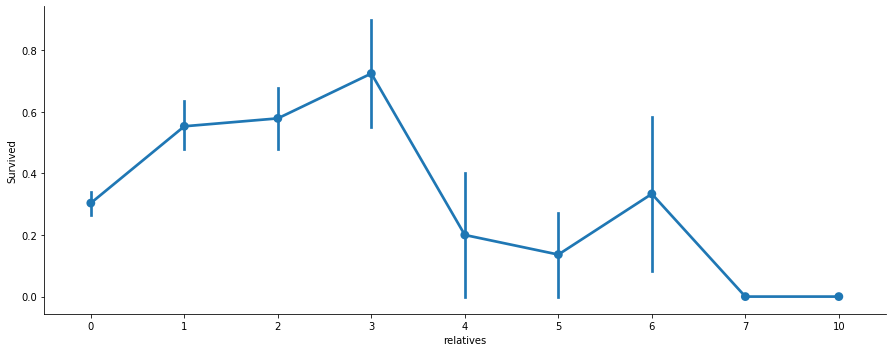

In [30]:
xes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, )

# Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Data Preprocessing:
 1. First, I will drop 'PassengerId' and 'Name' from the train set, because it does not contribute to a persons survival probability. 

In [31]:
train_data.drop(['PassengerId','Name'],axis = 1, inplace = True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,1.0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0.0


# Missing Data:
1 Cabin
As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177).
First I thought, we have to delete the 'Cabin' column but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck.

Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero

In [32]:
cabinValues = [1,2,3,4,5,6,7,8]
Deck = train_data['Cabin'].dropna(axis = 0).str[0:1].unique()
cabinKey = np.sort(Deck, kind = 'quick')
deckPair = {cabinKey[i]: cabinValues[i] for i in range(len(cabinKey))} 


In [33]:

train_data['Cabin'].fillna('0',inplace = True)

In [34]:
def setDeck(x):
    char1 = x[0:1]
    if char1 == '0':
        return 0
    else:
        return deckPair[char1]

In [35]:
train_data['Deck'] = train_data['Cabin'].apply(lambda x : setDeck(x))

In [36]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,1,1.0,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0.0,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,1.0,3
4,0,3,male,35.0,0,0,373450,8.0500,0,S,0,0.0,0
5,0,3,male,NaN,0,0,330877,8.4583,0,Q,0,0.0,0
6,0,1,male,54.0,0,0,17463,51.8625,E46,S,0,0.0,5
7,0,3,male,2.0,3,1,349909,21.0750,0,S,4,1.0,0
8,1,3,female,27.0,0,2,347742,11.1333,0,S,2,1.0,0
9,1,2,female,14.0,1,0,237736,30.0708,0,C,1,1.0,0


## Now we can drop "Cabin" column. what we did here,Cabin was denoting like C85, C floor cabin 85, Now Deck representing Floor only. Because survival may depend on floor instead of floor cabin number

In [37]:
train_data.drop(['Cabin'], inplace = True, axis = 1)

In [38]:
train_data['Deck'] = train_data['Deck'].astype('int32')

In [39]:
# Now deal with Age
train_data['Age'].isnull().sum()
xTrain = train_data.copy()
mean = xTrain['Age'].mean()
std = xTrain['Age'].std()
is_null = xTrain["Age"].isnull().sum()
print("Mean : {mean},Std : {std}, isNull : {isNull}".format(mean = mean, std = std,isNull = is_null))

Mean : 29.69911764705882,Std : 14.526497332334044, isNull : 177


In [40]:
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
len(rand_age)

177

## Fill NaN with calcutaed values,

In [41]:
nullIndex = xTrain['Age'].index[xTrain['Age'].apply(np.isnan)]
sr1 = pd.Series(rand_age, index = nullIndex) # It is necessary to set indexof NaN to series,so that it can set values according to index
xTrain['Age'].fillna(value = sr1,axis = 0,inplace = True) ## fillNa with with same length and on same index

In [42]:
xTrain["Age"].isnull().sum()

0

# Embarked
Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [43]:
xTrain['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [44]:
xTrain['Embarked'].fillna(value = 'S',axis = 0,inplace = True)

In [45]:
xTrain["Embarked"].isnull().sum()

0

In [46]:
xTrain.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64

In [47]:
ports = {"S": 0, "C": 1, "Q": 2}
xTrain['Embarked'] = xTrain['Embarked'].map(ports)
xTrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,1,1.0,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,1,1.0,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0.0,0
3,1,1,female,35.0,1,0,113803,53.1000,0,1,1.0,3
4,0,3,male,35.0,0,0,373450,8.0500,0,0,0.0,0
5,0,3,male,35.0,0,0,330877,8.4583,2,0,0.0,0
6,0,1,male,54.0,0,0,17463,51.8625,0,0,0.0,5
7,0,3,male,2.0,3,1,349909,21.0750,0,4,1.0,0
8,1,3,female,27.0,0,2,347742,11.1333,0,2,1.0,0
9,1,2,female,14.0,1,0,237736,30.0708,1,1,1.0,0


In [48]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null float64
Deck         891 non-null int32
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 80.1+ KB


## Above you can see that 'Fare' is a float and we have to deal with 3 categorical features: Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

In [49]:
genders = {"male": 0, "female": 1}
xTrain['Sex'] = xTrain['Sex'].map(genders)

In [50]:
xTrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,1,1.0,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,1,1.0,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0.0,0
3,1,1,1,35.0,1,0,113803,53.1000,0,1,1.0,3
4,0,3,0,35.0,0,0,373450,8.0500,0,0,0.0,0
5,0,3,0,35.0,0,0,330877,8.4583,2,0,0.0,0
6,0,1,0,54.0,0,0,17463,51.8625,0,0,0.0,5
7,0,3,0,2.0,3,1,349909,21.0750,0,4,1.0,0
8,1,3,1,27.0,0,2,347742,11.1333,0,2,1.0,0
9,1,2,1,14.0,1,0,237736,30.0708,1,1,1.0,0


In [51]:
xTrain['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

# Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [52]:
xTrain.drop(['Ticket'],axis = 1, inplace = True)

# Age:
Convert Age data type into Int

In [53]:
xTrain['Age'] = xTrain['Age'].astype('int32')

# Now remove some unnecessary Column
1 >SibSp & Parch = relatives, so we should remove both columns(SibSp  Parch)
2 : I do not this hat not_alone will make any sence beacuse we have same data in relaive

In [54]:
xTrain.drop(['SibSp','Parch','not_alone'], axis = 1, inplace = True)
cleanedData = xTrain.copy()
cleanedData.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,Deck
0,0,3,0,22,7.2500,0,1,0
1,1,1,1,38,71.2833,1,1,3
2,1,3,1,26,7.9250,0,0,0
3,1,1,1,35,53.1000,0,1,3
4,0,3,0,35,8.0500,0,0,0
5,0,3,0,35,8.4583,2,0,0
6,0,1,0,54,51.8625,0,0,5
7,0,3,0,2,21.0750,0,4,0
8,1,3,1,27,11.1333,0,2,0
9,1,2,1,14,30.0708,1,1,0


# Now Clean test_data same like traint_data

In [55]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
#test_data.drop(['PassengerId','Name'], axis = 1, inplace = True)
testData = test_data.copy()
testData['relatives'] = testData['SibSp'] + test_data['Parch']
cabinValues = [1,2,3,4,5,6,7,8]
Deck = testData['Cabin'].dropna(axis = 0).str[0:1].unique()
cabinKey = np.sort(Deck, kind = 'quick')
deckPair = {cabinKey[i]: cabinValues[i] for i in range(len(cabinKey))} 


testData['Cabin'].fillna('0',inplace = True)
testData['Deck'] = testData['Cabin'].apply(lambda x : setDeck(x))

# Now deal with Age
#testData['Age'].isnull().sum()
mean = testData['Age'].mean()
std = testData['Age'].std()
is_null = testData["Age"].isnull().sum()
print("Mean : {mean},Std : {std}, isNull : {isNull}".format(mean = mean, std = std,isNull = is_null))

rand_age = np.random.randint(mean - std, mean + std, size = is_null)
nullIndex = testData['Age'].index[testData['Age'].apply(np.isnan)]
sr1 = pd.Series(rand_age, index = nullIndex) 
testData['Age'].fillna(value = sr1,axis = 0,inplace = True) ## 

testData.dropna(axis = 0, inplace = True)

Mean : 30.272590361445783,Std : 14.18120923562442, isNull : 86


In [57]:
testData.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,2,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,0,S,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,0,Q,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,S,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,0,C,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,0,S,2,0


In [58]:
testData.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis = 1, inplace = True)
testData['Embarked'] = testData['Embarked'].map(ports)
testData['Sex'] = testData['Sex'].map(genders)

In [59]:
testData.head(10)

,Pclass,Sex,Age,Fare,Embarked,relatives,Deck
0,3,0,34.5,7.8292,2,0,0
1,3,1,47.0,7.0000,0,1,0
2,2,0,62.0,9.6875,2,0,0
3,3,0,27.0,8.6625,0,0,0
4,3,1,22.0,12.2875,0,2,0
5,3,0,14.0,9.2250,0,0,0
6,3,1,30.0,7.6292,2,0,0
7,2,0,26.0,29.0000,0,2,0
8,3,1,18.0,7.2292,1,0,0
9,3,0,21.0,24.1500,0,2,0


## Now lets jump into Machine Learning Models

In [60]:
X_train = cleanedData.drop("Survived", axis=1)
Y_train = cleanedData['Survived']
x_test = testData

In [61]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,relatives,Deck
0,3,0,22,7.2500,0,1,0
1,1,1,38,71.2833,1,1,3
2,3,1,26,7.9250,0,0,0
3,1,1,35,53.1000,0,1,3
4,3,0,35,8.0500,0,0,0


In [62]:
#cols = X_train.columns

In [63]:
## We Should make same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)

C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [64]:
#trainData = pd.DataFrame(X_train, columns = cols)


## Machine Learning Algorithm

In [65]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

scoreList =[]
alogoName =[]

## LogisticRegression

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
scoreList.append(acc_log)
alogoName.append('Logistic regression')
print(round(acc_log,2,), "%")

81.26 %


## Random Forest

In [67]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

alogoName.append('Random Forest')
scoreList.append(acc_random_forest)
print(round(acc_random_forest,2,), "%")

98.43 %


## K Nearest Neighbors

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(x_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
alogoName.append('K-Nearest Neighbors')
scoreList.append(acc_knn)
print(round(acc_knn,2,), "%")

88.1 %


# Gaussian Naive Bayes

In [69]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(x_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

alogoName.append('Gaussian')
scoreList.append(acc_gaussian)
print(round(acc_gaussian,2,), "%")

79.69 %


## Perceptron

In [70]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
alogoName.append('Perceptron')
scoreList.append(acc_perceptron)
print(round(acc_perceptron,2,), "%")

77.33 %


## Decision Tree

In [71]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
alogoName.append('Decision Tree')
scoreList.append(acc_decision_tree)
print(round(acc_decision_tree,2,), "%")

98.54 %


## SVC

In [72]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',kernel='rbf')
svc.fit(X_train, Y_train)

Y_pred = svc.predict(x_test)
acc_svc = round(decision_tree.score(X_train, Y_train) * 100, 2)
alogoName.append('SVC')
scoreList.append(acc_svc)
print(round(acc_svc,2,), "%")

98.54 %


In [73]:
scoreData = pd.DataFrame({
    'Algorithm' : alogoName,
    'Score' : scoreList,
    
})


In [74]:
#scoreData['Score'].sort_values(ascending = False)
scoreData = scoreData.sort_values(by='Score', ascending=False)
scoreData = scoreData.set_index('Score')

In [75]:
scoreData.head(10)

,Algorithm
Score,
98.54,Decision Tree
98.54,SVC
98.43,Random Forest
88.10,K-Nearest Neighbors
81.26,Logistic regression
79.69,Gaussian
77.33,Perceptron


In [76]:
from sklearn.model_selection import KFold
def KFoldEvaluation(X, y):
    scores = []
    algoName = []
    evaluate = {'RMD' : [],'DT' : [],'KNN' : [],'LR' : [],'Gaussian' : [],'Perceptron' : [],'LR' : [],'SVC' : []}
    cv = KFold(n_splits=30, random_state=42, shuffle=False)
    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
       
        decision_tree.fit(X_train, y_train)
        evaluate.get('DT').append(decision_tree.score(X_test, y_test))
        
        perceptron.fit(X_train, y_train)
        evaluate.get('Perceptron').append(perceptron.score(X_test, y_test))
        
        gaussian.fit(X_train, y_train)
        evaluate.get('Gaussian').append(gaussian.score(X_test, y_test))
        
        knn.fit(X_train, y_train)
        evaluate.get('KNN').append(knn.score(X_test, y_test))
        
        random_forest.fit(X_train, y_train)
        evaluate.get('RMD').append(random_forest.score(X_test, y_test))
        
        logreg.fit(X_train, y_train)
        evaluate.get('LR').append(logreg.score(X_test, y_test))
        
        svc.fit(X_train, y_train)
        evaluate.get('SVC').append(svc.score(X_test, y_test))
        
    dfg = pd.DataFrame(evaluate)
    return dfg.mean(axis = 0).sort_values(ascending = False)


In [78]:
performance = KFoldEvaluation(X_train,Y_train)
performance

SVC           0.818238
LR            0.811533
RMD           0.809425
KNN           0.795939
Gaussian      0.790383
DT            0.775862
Perceptron    0.754100
dtype: float64

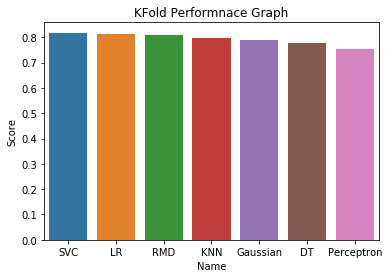

In [130]:
perFormanceData = pd.DataFrame(
{
    'Name' : performance.index.values,
    'Score' : performance[:].values
}
)

plt.title("KFold Performnace Graph")
sns.barplot(x='Name', y='Score', data=perFormanceData)

## >>>>>>>>>>>>>>>>>>>>>>>>>End Project >>>>>>>>>>>>>>>>>>>>>>>